In [41]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Fashion MNIST

In [127]:
train_df = pd.read_csv('./data/fashion-mnist_train.csv')
test_df = pd.read_csv('./data/fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
class_map = {0: 'T-short/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
             5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] /255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

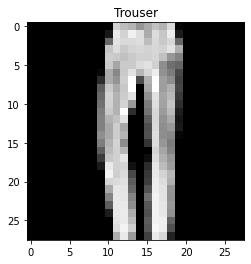

In [172]:
def display_image(data, label, class_map, i=0):
    image = data[i].reshape((28, 28))
    plt.imshow(image, cmap='gray')
    plt.title(class_map[label[i]])
    plt.show()

display_image(x_test, y_test, class_map, i=1)

In [161]:
x_train.shape

(60000, 784)

## SVM

In [47]:
model = SVC(C=10)
model.fit(x_train, y_train)

SVC(C=10)

In [48]:
model.score(x_test, y_test)

0.9083

# Fourier transform as features

In [203]:
import cv2

def get_spectrum(image):
    dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
    if 0 in magnitude:
        for i, row in enumerate(magnitude):
            for j, pixel in enumerate(row):
                if pixel == 0:
                    magnitude[i, j] = 1e-3
    magnitude_spectrum = 20*np.log(magnitude) #magnitude, spectrum, energy
    
    return magnitude_spectrum

def display_fourier(image, cmap='gray'):
    spectrum = get_spectrum(image)
    #show the result
    plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray'), plt.title("image")
    plt.subplot(1,2, 2)
    plt.imshow(spectrum, cmap=cmap), plt.title("fourier spectrum")
    plt.show()

In [176]:
import warnings

In [208]:
def convert2spectrum(data):
    data_fourier = np.zeros((len(data), 784))
    for i, image in enumerate(data):
        image = image.reshape((28, 28))
        spectrum = get_spectrum(image)
        
        data_fourier[i] = spectrum.reshape((-1))
    return data_fourier

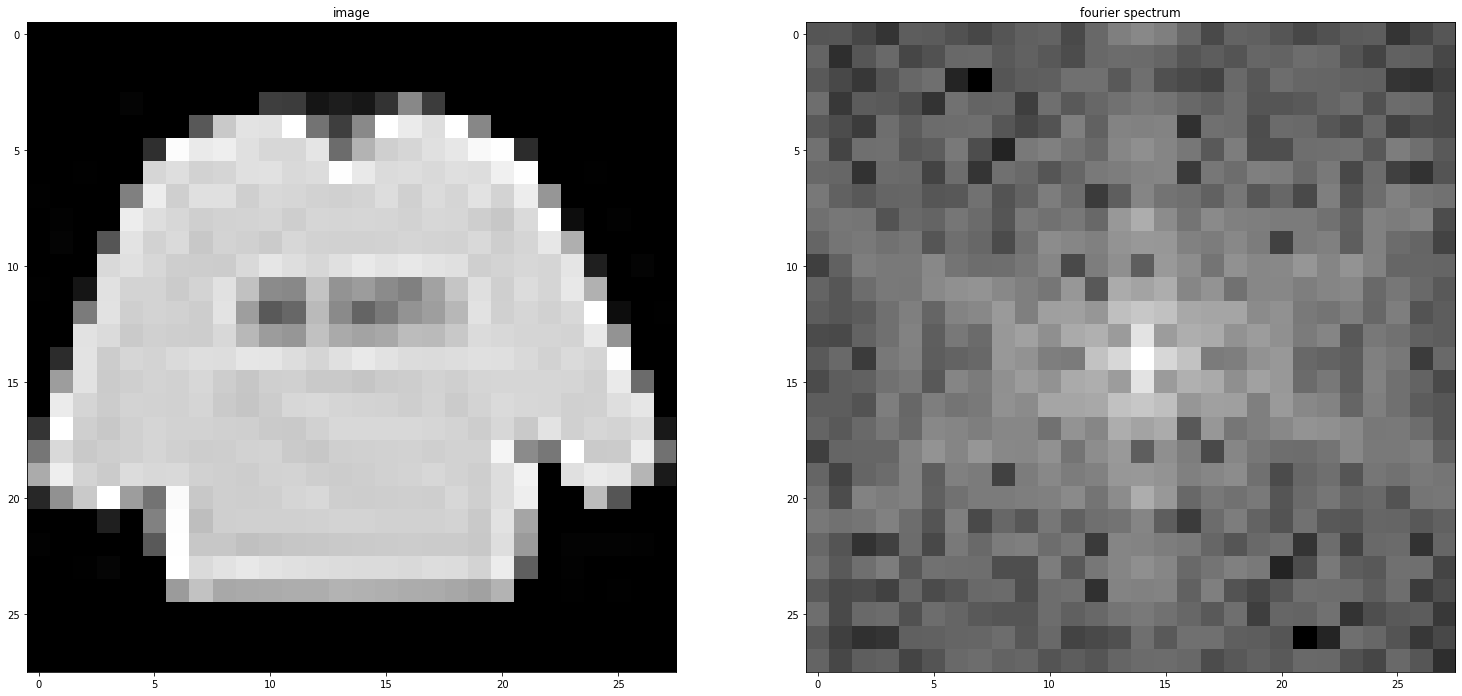

In [163]:
i = 0

image = x_train[i].reshape((28, 28))

display_fourier(image, cmap='gray')

In [164]:
x_train_fourier = convert2spectrum(x_train)

In [209]:
x_test_fourier = convert2spectrum(x_test)

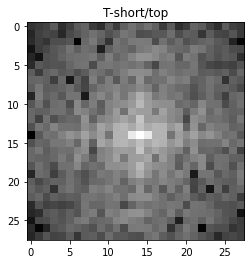

In [168]:
display_image(x_test_fourier, y_test, class_map, i=0)

## SVM on fourier transform

In [ ]:
model = SVC()
model.fit(x_train_fourier, y_train)

model.score(x_test_fourier, y_test)

In [207]:
len(x_test)

10000

# Debugging

In [197]:
a = np.array(([1, 2, 3], [2, 3, 4]))
a

array([[1, 2, 3],
       [2, 3, 4]])

In [200]:
for i, row in enumerate(a):
    print(row)
    for j, ele in enumerate(row):
        print(ele)
        a[i, j] = 1
        
print(a)

[1 2 3]
1
2
3
[2 3 4]
2
3
4
[[1 1 1]
 [1 1 1]]


In [202]:
1 in a

True